## MSBA CAPSTONE - Swire Coca-cola Customer Success Prediction

## Business Problem Statement

#### Swire Coca-cola business is a 'B2B' driven by local businesses such as restaurants. To partner with another business, Swire needs to analyze if the partnered business can gain profits and less risk of loss. To resolve this issue, the company needs to improve its ability to predict the following metrics:
#### 1) Business popularity by checking its overall rating ( 4.0 or higher online reviews), 
#### 2) Longevity (1, 2, or 3+ years),
#### 3) 3-year volume sales.

#### The main objective is to identify the factors like Profit, Costs, Trade Channel, Beverage Type that will help Swire Coca-cola to understand the market well and the potential customers.
#### By Analyzing the metrics mentioned above, Swire Coca-cola aims to identify the prospective business customers and determine the price and funding for a business who are most likely to provide high profits and less risk.
#### The project will succeed by analyzing the customer and sales data, providing Swire Coca-cola with a list of Customers, which will help them to gain more profits. The project timeline is three months, delivered by 3 MSBA graduate students.

## EDA

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pydoc import help
from scipy.stats.stats import pearsonr

/var/folders/8x/93kyj3hd2x91954g76ltpg_m0000gn/T/ipykernel_38548/2070060536.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


### Importing Data

In [2]:
cus_df = pd.read_excel("/Users/msdta/Downloads/FSOP_Customer_Data_v2.0.xlsb", engine='pyxlsb')
sales_df = pd.read_excel("/Users/msdta/Downloads/FSOP_Sales_Data_v2.0.xlsb", engine='pyxlsb')

In [3]:
cus_df

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
1,C0409008701210025,"Tacoma, WA","Tacoma Sales Center, WA",39944,FORT LEWIS,98433,PIERCE,-122.587244,47.102365,Eating & Drinking,Quick Service Restau,QSR-Pizza,DSD,Quick Service Restau,FSOP,EATING/DRINKING
2,C0278065006510168,"Walla Walla, WA","Walla Walla, WA",38035,COLLEGE PLACE,99324-9730,WALLA WALLA,-118.373040,46.052920,Other Shopping & Ser,General Merchandiser,Hardware/Home-Improv,DSD,General Merchandiser,FSOP,RETAIL
3,C0559043803480412,"Prescott, AZ","Glendale, AZ",34215,PRESCOTT,86301-3313,YAVAPAI,-112.450490,34.545020,Travel/Transportatio,Lodging,Other Lodging,DSD,Lodging,FSOP,LODGING
4,C0729091103720749,"Reno, NV","Reno, NV",41990,SOUTH LAKE TAHOE,96150-7702,EL DORADO,-119.984227,38.926637,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40381,C0969054506370153,"Johnstown, CO","Johnstown, CO",43486,GREELEY,80631-9529,WELD,-104.677498,40.429684,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
40382,C0826029007880667,"Tempe, AZ","Tempe, AZ",43353,CHANDLER,85224-2878,MARICOPA,-111.859055,33.338470,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
40383,C0720037102950022,"Albuquerque, NM","Albuquerque, NM",42991,ALBUQUERQUE,87113-1554,BERNALILLO,-106.597680,35.184660,Entertainment/Recrea,Recreation,Other Recreation,Spcl Evnt: One Time,Recreation,FSOP,DESTINATION VENUE
40384,C0285043409270577,"Draper, UT","Draper, UT",40140,SALT LAKE CITY,84104,SALT LAKE,-111.974670,40.749605,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL


In [4]:
sales_df

,CUSTOMER_NUMBER_BLINDED,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
0,C0051046109640797,M056203880974,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Contour,20 OZ 1-Ls 24,88.0,2246.40,2505.60,1924.70,1112.73,682.41,44208,44925,157
1,C0348074302380406,M042308250090,CORE SPARKLING,LOW CALORIE,Aluminum Can - Sleek,12 OZ 4-Pk 24,58.0,1197.12,1666.92,1468.77,316.19,1185.98,44229,44925,40
2,C0277089703710223,M010605530774,TEA,LOW CALORIE,Plastic Bottle - Other,18.5 OZ 1-Ls 12,108.0,3429.00,1755.00,1499.03,403.25,1107.73,44627,44925,62
3,C0112072503650635,M050800200648,ENERGY DRINKS,REGULAR CALORIE,Aluminum Can,16 OZ 1-Ls 24,15.0,307.12,592.88,553.18,77.90,475.28,44721,44925,17
4,C0305009008200279,M009608400345,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Dimple,2 LTR 1-Ls 8,195.0,3382.05,2077.95,1812.90,661.21,1416.99,44201,44925,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831853,C0307020406420075,M071209640783,OTHER NONALCOHOLIC BEVERAGES,REGULAR CALORIE,CO2 Tank,35 POUND 1-Ls,3.0,0.00,105.00,105.00,105.00,0.00,44348,44348,1
831854,C0779075600590854,M093805490555,COFFEE,REGULAR CALORIE,Plastic Bottle - Other,13.7 OZ 1-Ls 12,0.0,0.00,0.00,0.00,0.00,0.00,44898,44898,1
831855,C0365041003280192,M092808600873,NaN,NaN,Shell,20 OZ 1-Ls,-1.0,0.00,0.00,0.00,0.00,0.00,44321,44321,1
831856,C0048058308430224,M050806830695,NaN,NaN,Pallet,40 X 48 INCH 1-Ls,4.0,0.00,0.00,0.00,0.00,0.00,44498,44498,1


### Merging Data

In [5]:
swire_data = cus_df.merge(sales_df, on='CUSTOMER_NUMBER_BLINDED', how='inner')
swire_data

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,...,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,20 OZ 1-Ls 12,0.0,0.00,0.00,0.00,0.00,0.00,44372,44925,8
1,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,20 OZ 1-Ls 24,0.0,0.00,0.00,-0.28,-0.22,0.00,44378,44379,2
2,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,40 X 48 INCH 1-Ls,-7.0,0.00,0.00,0.00,0.00,0.00,44348,44544,5
3,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,16 OZ 1-Ls,2.0,71.97,128.03,128.03,85.70,42.33,44397,44838,2
4,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,16 OZ 1-Ls 24,0.0,0.00,0.00,-0.09,-0.07,0.00,44378,44379,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831839,C0969054506370153,"Johnstown, CO","Johnstown, CO",43486,GREELEY,80631-9529,WELD,-104.677498,40.429684,Third Party (Non-Con,...,12 OZ 12-Pk 24 Frid,0.0,0.00,0.00,0.00,0.00,0.00,44205,44233,2
831840,C0826029007880667,"Tempe, AZ","Tempe, AZ",43353,CHANDLER,85224-2878,MARICOPA,-111.859055,33.338470,Third Party (Non-Con,...,7.5 OZ 6-Pk 24,0.0,0.00,0.00,0.00,0.00,0.00,44261,44261,1
831841,C0720037102950022,"Albuquerque, NM","Albuquerque, NM",42991,ALBUQUERQUE,87113-1554,BERNALILLO,-106.597680,35.184660,Entertainment/Recrea,...,20 OZ 1-Ls 24,0.0,0.00,0.00,0.00,0.00,0.00,44832,44832,1
831842,C0285043409270577,"Draper, UT","Draper, UT",40140,SALT LAKE CITY,84104,SALT LAKE,-111.974670,40.749605,Other Shopping & Ser,...,5 GALLON 1-Ls,2.0,160.22,199.78,199.78,69.80,176.28,44208,44278,2


In [6]:
swire_data.dtypes

CUSTOMER_NUMBER_BLINDED                    object
SALES_OFFICE_DESCRIPTION                   object
DELIVERY_PLANT_DESCRIPTION                 object
ON_BOARDING_DATE                            int64
ADDRESS_CITY                               object
ADDRESS_ZIP_CODE                           object
COUNTY                                     object
GEO_LONGITUDE                             float64
GEO_LATITUDE                              float64
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION      object
CUSTOMER_TRADE_CHANNEL_DESCRIPTION         object
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION     object
BUSINESS_TYPE_EXTENSION_DESCRIPTION        object
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2        object
MARKET_DESCRIPTION                         object
COLD_DRINK_CHANNEL_DESCRIPTION             object
PRODUCT_SOLD_BLINDED                       object
BEV_CAT_DESC                               object
CALORIE_CAT_DESC                           object
PACK_TYPE_DESC                             object


### Checking for Duplicates

In [7]:
swire_data.duplicated().sum()

0

### Summary Statistics of the data

In [8]:
swire_data.describe()

,ON_BOARDING_DATE,GEO_LONGITUDE,GEO_LATITUDE,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
count,8.318440e+05,831844.000000,831844.000000,831844.000000,8.318440e+05,8.318440e+05,8.318440e+05,831844.000000,8.318440e+05,831844.000000,831844.000000,831844.000000
mean,4.151462e+04,-114.071501,40.844303,36.216629,1.003791e+03,9.264490e+02,8.452765e+02,294.968306,5.802669e+02,44423.543890,44751.825311,21.227132
std,7.099246e+03,6.239538,5.026316,564.497164,1.333821e+04,8.980693e+03,7.750886e+03,2631.942989,5.575562e+03,215.662813,215.170246,33.455899
min,2.979900e+04,-124.590450,0.000000,-65832.000000,-1.390200e+04,-2.298240e+04,-3.453411e+04,-145562.380000,-7.392340e+03,44198.000000,44198.000000,1.000000
25%,3.995900e+04,-121.301071,37.678385,1.000000,1.764000e+01,3.110000e+01,2.928000e+01,8.620000,1.246000e+01,44236.000000,44617.000000,2.000000
50%,4.250600e+04,-112.036835,40.605505,5.000000,9.000000e+01,1.367900e+02,1.300000e+02,44.800000,7.270000e+01,44349.000000,44860.000000,7.000000
75%,4.385700e+04,-110.976735,45.514964,17.000000,4.134000e+02,5.234200e+02,5.000000e+02,181.940000,2.976700e+02,44593.000000,44925.000000,24.000000
max,2.958465e+06,0.000000,49.002050,136349.000000,2.847662e+06,1.813004e+06,1.813004e+06,883618.130000,1.370468e+06,44925.000000,44926.000000,468.000000


### Exploratory Questions:

#### 1. If more discounts are provided to the customers, Are they capable enough of gaining more profits?
#### 2. Which customers are able to sell goods faster?
#### 3. Which beverage, calorie type has the highest market?
#### 4. Which Trade Channel is swire making most of the business?
#### 5. Which Cities has the highest number of business with Swire?

### Metric 1: Identifying the correlation between Discounts and Profits

In [9]:
avg_discount = swire_data['DISCOUNT'].mean()
avg_profit = swire_data['GROSS_PROFIT_DEAD_NET'].mean()

In [10]:
dis = swire_data.groupby('DISCOUNT').mean()

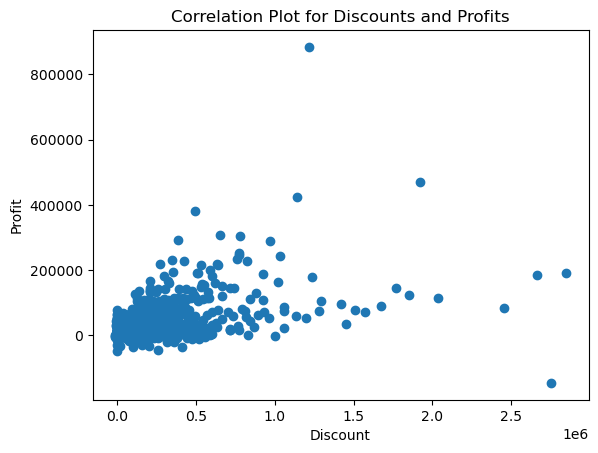

In [11]:
# Scatter plot to visualize the relationship between discounts and profits. 

plt.scatter(swire_data['DISCOUNT'], swire_data['GROSS_PROFIT_DEAD_NET'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Correlation Plot for Discounts and Profits')
plt.show()

In [12]:
corr, _ = pearsonr(swire_data['DISCOUNT'], swire_data['GROSS_PROFIT_DEAD_NET'])
print('Correlation coefficient: %.3f' % corr)

Correlation coefficient: 0.658


### Metric 1 Result

#### The main reason to check the correlation between discounts and profits are as follows:
#### 1. If the correlation coefficient is positive it indicates that the discounts and profits are positively related. It also indicates that if discounts are high the profits are also high.

#### 2. If the correlation coefficient is negative it indicates that the discounts and profits are negatively related. It also indicates that discounts are high but profits are not high for the customer.

### Metric 2: Customers with cost of goods sold in less time.

In [13]:
# Converting the date columns to datetime objects

swire_data['MIN_POSTING_DATE'] = pd.to_datetime(swire_data['MIN_POSTING_DATE'])
swire_data['MAX_POSTING_DATE'] = pd.to_datetime(swire_data['MAX_POSTING_DATE'])

In [14]:
# Calculate the time difference for each customer

swire_data['time_difference'] = (swire_data['MAX_POSTING_DATE'] - swire_data['MIN_POSTING_DATE']).dt.days

In [15]:
# Calculate the total cost of goods sold for each customer

total_costs = swire_data.groupby('CUSTOMER_NUMBER_BLINDED')['COGS'].sum()

In [16]:
# Divide the total cost of goods sold by the time difference for each customer

costs_per_day = total_costs / swire_data.groupby('CUSTOMER_NUMBER_BLINDED')['time_difference'].max()

In [17]:
# Sort the results in descending order

costs_per_day = costs_per_day.sort_values(ascending=False)

In [18]:
# Print the top 20 customers with the highest cost of goods sold per day

print(costs_per_day.index[0:20])

Index(['C0001005009010198', 'C0670035904880526', 'C0670059902000159',
       'C0670059804470675', 'C0670059603590270', 'C0670059502540690',
       'C0670059106930479', 'C0670055500820756', 'C0670053903570761',
       'C0670049704850097', 'C0670041807560383', 'C0670041208950499',
       'C0670039404230494', 'C0670039008190169', 'C0670038204990962',
       'C0670036307150519', 'C0670034709570501', 'C0670064509250943',
       'C0670032502330081', 'C0670031305690557'],
      dtype='object', name='CUSTOMER_NUMBER_BLINDED')


### Metric 2 Result
#### The main reason to check the customers with the cost of goods sold in less time is as follows:
#### 1. To identify the customers which are able to sell goods faster in a less span of time. This metric will enable us to know and predict which business are capable enough to make more profits and sales. So that business can be done with that customer.

### Metric 3: Beverages, Calorie Type that has more market.

In [19]:
# Group the data by the beverage type and count the number of occurencies of each beverage count

bev_counts = swire_data.groupby('BEV_CAT_DESC')['BEV_CAT_DESC'].count()

In [20]:
# Sort the results in descending order

bev_counts = bev_counts.sort_values(ascending=False)

In [21]:
# Top Beverages

top_bev = bev_counts[:]

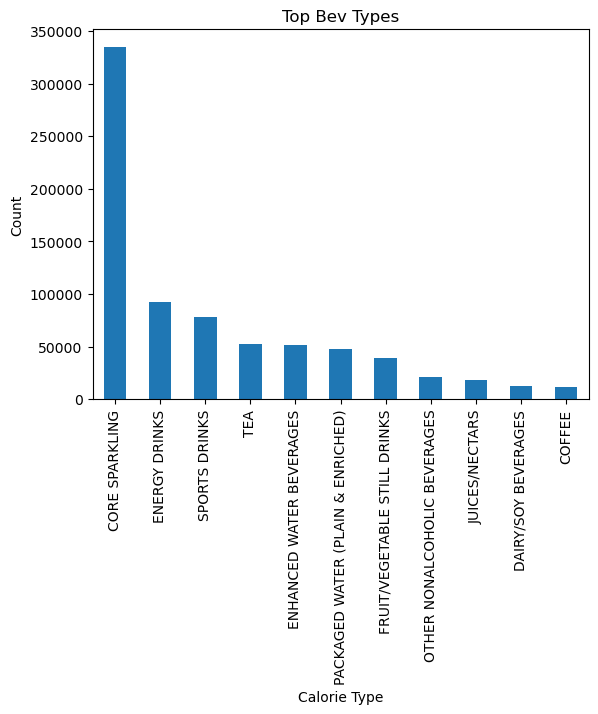

In [22]:
# Bar Plot

top_bev.plot(kind='bar')
plt.title('Top Bev Types')
plt.xlabel('Calorie Type')
plt.ylabel('Count')
plt.show()

### Calorie Type

In [23]:
# Group the data by the calorie type and count the number of occurencies of each calorie count

calorie_counts = swire_data.groupby('CALORIE_CAT_DESC')['CALORIE_CAT_DESC'].count()

# Sort the results in descending order

calorie_counts = calorie_counts.sort_values(ascending=False)

top_calorie = calorie_counts[:10]

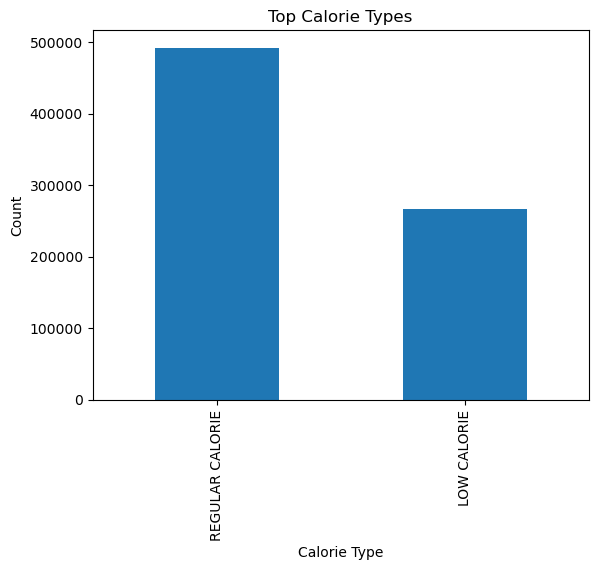

In [24]:
#Bar Plot

top_calorie.plot(kind='bar')
plt.title('Top Calorie Types')
plt.xlabel('Calorie Type')
plt.ylabel('Count')
plt.show()

### Metric 3 Result
#### The main reason to check the beverages that has more market as follows:
#### 1. This metric will help us to understand that new customers who are trying to do business for these beverages can be given priority. As these beverages already has demand in the market, so new customers also will be able to sell the beverages easily and gain good profits.

### Metric 4: Trade Channel that swire makes most of the business.

In [25]:
# Group the data by the trade channel and count the number of occurencies of each trade channel

trade_channel = swire_data.groupby('CUSTOMER_TRADE_CHANNEL_DESCRIPTION')['CUSTOMER_TRADE_CHANNEL_DESCRIPTION'].count()

In [26]:
# Sort the results in descending order

trade_counts = trade_channel.sort_values(ascending=False)

In [27]:
# Top Trade Channel

top_trade = trade_counts[:]

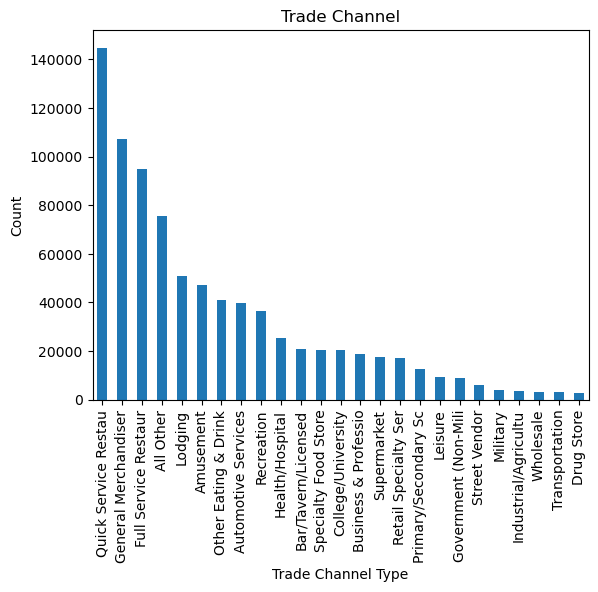

In [28]:
# Bar Plot

top_trade.plot(kind='bar')
plt.title('Trade Channel')
plt.xlabel('Trade Channel Type')
plt.ylabel('Count')
plt.show()

### Metric 5: Cities that has the highest number of business with Swire

In [29]:
# Group the data by the city and count the number of occurencies of each city

city_counts = swire_data.groupby('ADDRESS_CITY')['ADDRESS_CITY'].count()

In [30]:
# Sort the results in descending order

city_counts = city_counts.sort_values(ascending=False)

In [31]:
# Top 10 Cities

top_10_cities = city_counts[:10]

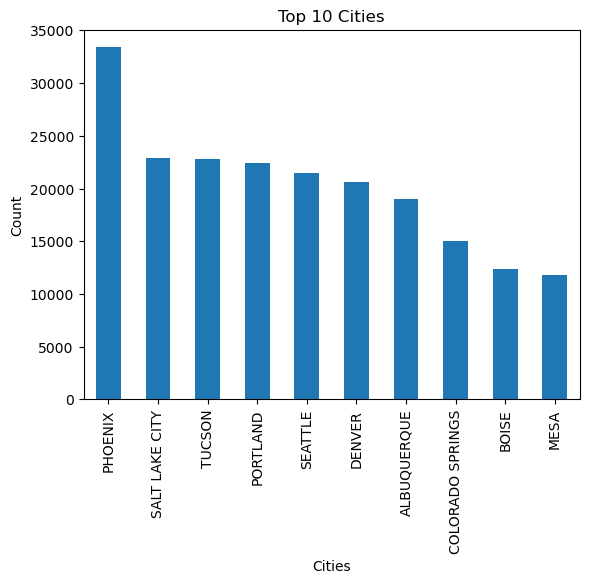

In [32]:
# Bar Plot

top_10_cities.plot(kind='bar')
plt.title('Top 10 Cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

### Metric 5 Result
#### The main reason to check the top cities that swire makes most business with are as follows:
#### 1. This metric will help us to understand which cities does Swire do the most business with. so that, they can confidently partner with new customers from that city.

## Overall Results

#### I observed that the customers who were offered with more discounts have gotten more profits. As the correlation coefficient is positive. So, customers offered with more discounts are capable of gaining profits.
#### Customers who have sold their goods in less span of time are capable of selling more than expected amount of products. 
#### Simultaneously, knowing the type of beverages, calorie type, highest trade channel, top most cities will help Swire to understand what is the market popular for and the top cities where the business is in demand.

#### The above results are my observations from the data provided.

##### Please provide me a feedback if i'm thinking and working in the right direction.